# Loading Fits Files

In [4]:
#Define a function to handle loading of fits files given a path:
import numpy as np
import matplotlib.pyplot as plt
import pyfits as pf #(or from astropy.io import fits as pf)
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)

In [5]:
def fits_load(path):
    hdu_list = pf.open(path) #loads the fits object
    image_data = hdu_list[0].data
    header = hdu_list[0].header
    return header, image_data

In [6]:
#Lets load a sample fits file
head, img = fits_load('2011_09_13.fits')
print 'PIXSCALE: ', head['PIXSCALE'] #example of querying the header for information
print img #show we have a 2D array of values. 


PIXSCALE:  0.304
[[ 34.20410156  43.80419922  34.59619141 ...,  38.51464844  37.14306641
   39.88574219]
 [ 38.31835938  38.12255859  34.98779297 ...,  38.12255859  34.59619141
   39.29833984]
 [ 41.64941406  37.33886719  36.359375   ...,  36.94726562  44.19628906
   40.47363281]
 ..., 
 [ 38.90625     41.25732422  36.55517578 ...,  38.71044922  41.84521484
   34.79199219]
 [ 36.55517578  39.68994141  40.27783203 ...,  38.12255859  42.04101562
   39.10205078]
 [ 36.55517578  36.55517578  36.16357422 ...,  41.06152344  39.10205078
   30.48144531]]


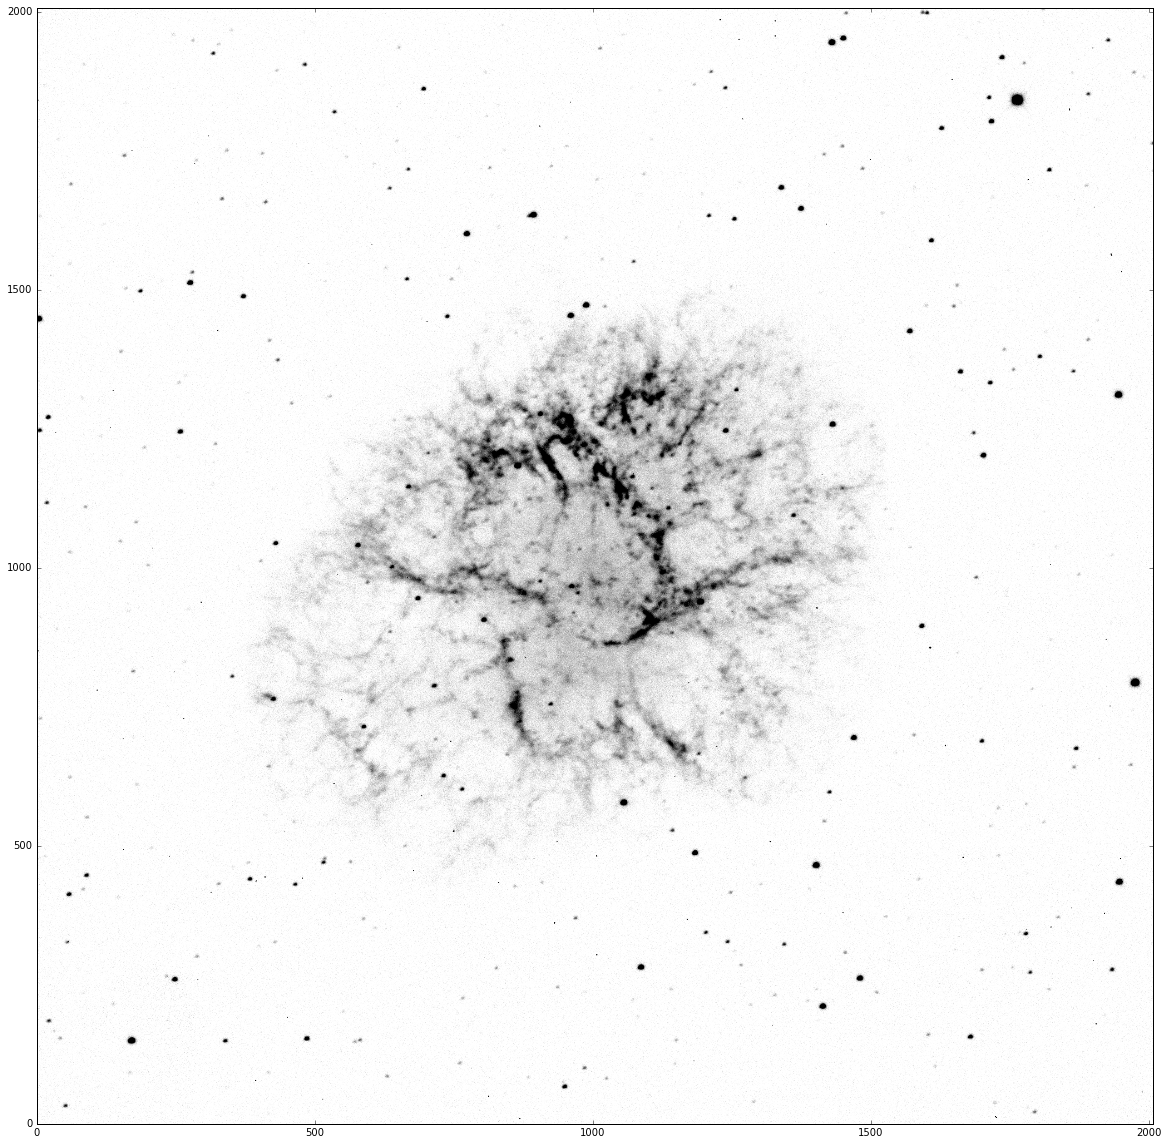

In [7]:
#Show the image (more on this later)
plt.imshow(img, origin='lower', cmap='gray_r',vmin=np.mean(img), vmax=np.mean(img)*2.5)
plt.show()

In [31]:
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage import data
import skimage

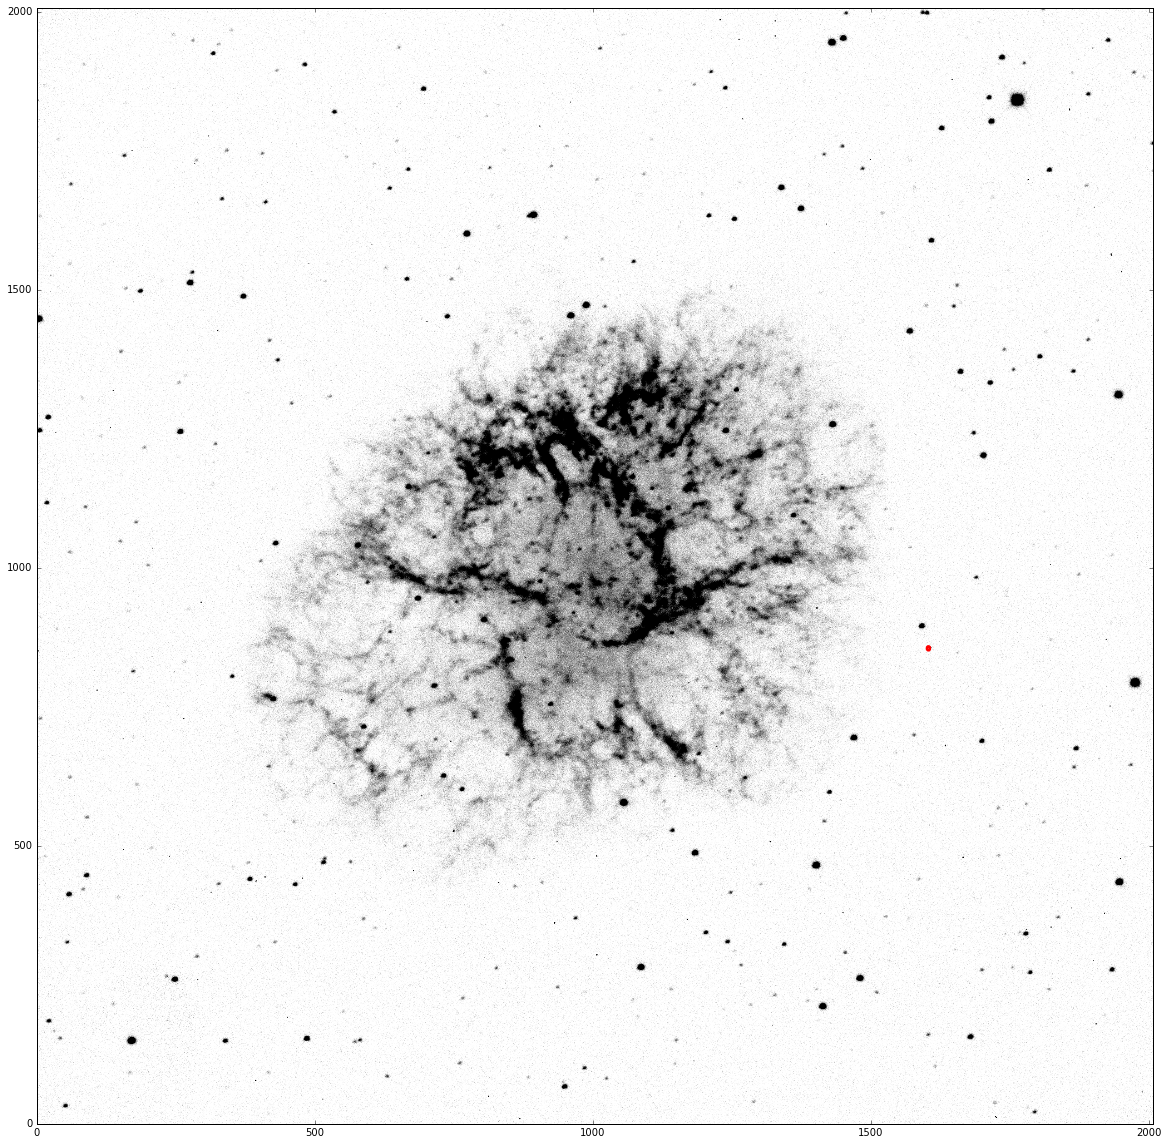

In [51]:
# Compute radii in the 3rd column.

img= skimage.exposure.rescale_intensity(img, in_range=(np.min(img),np.max(img)))
#blobs_log = blob_log(img, max_sigma=30, num_sigma=10, threshold=.1)
#blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)
#blobs_dog = blob_dog(img, max_sigma=30, threshold=.1)
#blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(img,min_sigma=1,max_sigma=50)

#blobs_list = [blobs_log, blobs_dog, blobs_doh]
#colors = ['yellow', 'lime', 'red']
#titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
#          'Determinant of Hessian']
#sequence = zip(blobs_list, colors, titles)


#fig,axes = plt.subplots(1, 3, sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
#axes = axes.ravel()
#for blobs, color, title in sequence:
#    ax = axes[0]
#    axes = axes[1:]
#    ax.set_title(title)
#    ax.imshow(img, cmap='gray_r', interpolation='nearest',vmin=np.mean(img),vmax=np.mean(img)*2.0)
#    for blob in blobs:
#        y, x, r = blob
#        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
#        ax.add_patch(c)
fig, ax = plt.subplots()
ax.imshow(img, origin='lower', cmap='gray_r',vmin=np.mean(img), vmax=np.mean(img)*2.5)
for i in range(len(blobs_doh)):
    c = plt.Circle((blobs_doh[i][1],blobs_doh[i][0]), 3*blobs_doh[i][2], linewidth=2, fill=False,color='r')
    ax.add_patch(c)
plt.show()




array([[  8.54000000e+02,   1.60400000e+03,   1.00000000e+00],
       [  8.56000000e+02,   1.60400000e+03,   1.00000000e+00],
       [  1.84000000e+03,   1.76200000e+03,   4.22222222e+00]])